In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
FILE_PATH = 'data/pilot6.json'
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

186

In [3]:
#expected, unexpected conditions
exp_start, unexp_start = [], []
exp_finish, unexp_finish = [], []

for entry in all_entries:  
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        #starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']   
        if condition == 'expected':
            exp_finish.append(entry)
        else:
            unexp_finish.append(entry)
print(len(exp_finish), len(unexp_finish))

50 41


In [4]:
#calculate aha and warm ratings for expected
exp_aha1 = [] #final ratings for the first anagram
exp_warm1 = [[] for i in range(8)]
exp_quiz = [] #answer to the quiz
exp_aha2 = [] #final ratings for the second anagram
exp_warm2 = [[] for i in range(8)]

for entry in exp_finish:
    entry_data = entry['data']        
    
    r= entry_data[5]['responses']
    exp_quiz.append(int(r[7])) #people give quiz on 6  
    
    for i in range(8): #warm ratings here 7, 10, 13, 16, 19, 22, 25, 28            
            r = entry_data[3*(i+2)+1]['responses'] #get people's warm rating here for ORGANIC
            exp_warm1[i].append(int(r[6]))
         
    r = entry_data[30]['responses'] #get people's aha rating here for ORGANIC
    exp_aha1.append(int(r[6]))
    
    for k in range(8): #warm ratings here 33,36,39,42, 45,48, 51, 54
            r = entry_data[3*(k+11)]['responses'] #get people's warm rating here for Naughty
            exp_warm2[k].append(int(r[6]))
    
    r = entry_data[-1]['responses'] #get people's aha rating here for NAUGHTY
    exp_aha2.append(int(r[6]))

#calculate aha and warm ratings for unexpected
unexp_aha1 = [] #final ratings for the first anagram
unexp_warm1 = [[] for i in range(8)]
unexp_quiz = []
unexp_aha2 = [] #final ratings for the second anagram
unexp_warm2 = [[] for i in range(3)]
for entry in unexp_finish:
    entry_data = entry['data']    

    r= entry_data[5]['responses']
    unexp_quiz.append(int(r[7])) #people give quiz on 19 
    
    for i in range(8): #warm ratings here 6, 9, 12, 15
            r = entry_data[3*(i+2)+1]['responses'] #get people's warm rating here for Organic
            unexp_warm1[i].append(int(r[6]))
         
    r = entry_data[30]['responses'] #get people's aha rating here for Naughty
    unexp_aha1.append(int(r[6]))
       
    for k in range(3): #warm ratings here 30, 33, 36, 39
            r = entry_data[3*(k+11)]['responses'] #get people's warm rating here for PHONE
            unexp_warm2[k].append(int(r[6]))
    
    r = entry_data[-1]['responses'] #get people's aha rating here for NAUGHTY
    unexp_aha2.append(int(r[6]))
    
#print(exp_warm2)
print(exp_warm1)
print(exp_aha1)
print(unexp_warm2)
print(unexp_aha2)
#print(unexp_warm2)

[[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 9, 0, 1, 2, 0, 0, 2, 5, 1, 6, 0, 0, 3, 1, 9, 1, 0, 0, 1, 3, 0, 0, 1, 3, 0, 2, 0, 2, 0, 0], [9, 9, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 9, 0, 1, 2, 0, 0, 2, 4, 1, 9, 0, 0, 3, 1, 9, 1, 0, 1, 6, 9, 0, 0, 2, 4, 0, 2, 0, 2, 0, 2], [9, 9, 0, 0, 1, 0, 9, 9, 0, 0, 1, 1, 0, 0, 9, 0, 0, 2, 0, 0, 9, 0, 1, 3, 9, 0, 2, 4, 8, 9, 9, 1, 4, 1, 9, 1, 0, 2, 9, 9, 0, 0, 1, 6, 0, 2, 0, 2, 0, 0], [9, 9, 0, 1, 0, 0, 9, 9, 0, 0, 1, 9, 0, 9, 9, 0, 0, 2, 0, 0, 9, 0, 1, 2, 9, 0, 2, 4, 6, 9, 9, 0, 4, 1, 9, 1, 0, 1, 9, 9, 1, 1, 3, 8, 1, 2, 0, 2, 0, 1], [9, 9, 0, 0, 0, 0, 9, 9, 0, 0, 1, 9, 0, 9, 9, 0, 0, 2, 0, 0, 9, 0, 1, 2, 9, 0, 1, 4, 9, 9, 9, 0, 4, 1, 9, 2, 0, 1, 9, 9, 1, 1, 3, 9, 1, 2, 0, 3, 0, 0], [9, 9, 2, 1, 1, 0, 9, 9, 0, 0, 1, 9, 0, 9, 9, 0, 0, 5, 0, 0, 9, 0, 1, 2, 9, 9, 3, 4, 7, 9, 9, 0, 5, 2, 9, 2, 0, 1, 9, 9, 2, 0, 3, 9, 1, 2, 1, 3, 0, 8], [9, 9, 1, 0, 0, 0, 9, 9, 0, 0, 1, 9, 0, 9, 9, 0, 0, 9, 0, 0, 9, 0, 1, 2, 9, 9, 1, 4, 6,

In [5]:
#remove bad subjects
import itertools

exp_idx = []

for k in range(7):
    indices = [i for i, x in enumerate(exp_warm2[k]) if x == 9] #if gotten answer before already
    exp_idx.append(indices)

indices = [i for i, x in enumerate(exp_warm2[7]) if x < 5] #if not got the answer at the last round
exp_idx.append(indices)

indices = [i for i, x in enumerate(exp_quiz) if x != 7] #if not got the correct quiz answer
exp_idx.append(indices)

exp_idx = list(itertools.chain.from_iterable(exp_idx))
exp_idx = list(sorted(set(exp_idx))) #get unique values

unexp_idx = []
for k in range(2):
    indices = [i for i, x in enumerate(unexp_warm2[k]) if x == 9] #if gotten answer before already
    unexp_idx.append(indices)

indices = [i for i, x in enumerate(unexp_warm2[2]) if x < 5] #if not got the answer at the last round
unexp_idx.append(indices)

indices = [i for i, x in enumerate(unexp_quiz) if x != 7] #if not got the correct quiz answer
unexp_idx.append(indices)

unexp_idx = list(itertools.chain.from_iterable(unexp_idx)) #flatten the list
unexp_idx = list(sorted(set(unexp_idx))) #get unique values

print(exp_aha2)
exp_aha2 = [i for j, i in enumerate(exp_aha2) if j not in exp_idx]
print(len(exp_idx))
print(exp_aha2)

print(unexp_aha2)
unexp_aha2 = [i for j, i in enumerate(unexp_aha2) if j not in unexp_idx]
print(len(unexp_idx))
print(unexp_aha2)


[0, 0, 6, 1, 0, 0, 0, 5, 0, 6, 5, 1, 3, 0, 5, 3, 6, 0, 0, 0, 6, 0, 1, 0, 0, 6, 1, 6, 1, 0, 0, 6, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 6, 6, 0, 6]
37
[1, 5, 6, 1, 3, 5, 3, 6, 6, 1, 6, 3, 6]
[1, 6, 6, 5, 3, 6, 0, 0, 4, 0, 3, 4, 6, 0, 5, 0, 0, 2, 5, 0, 0, 0, 6, 0, 0, 6, 0, 1, 6, 6, 5, 0, 3, 0, 0, 0, 5, 0, 6, 3, 6]
23
[6, 6, 5, 6, 4, 3, 4, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6]


-2.1655611680148383 0.04651529849910848


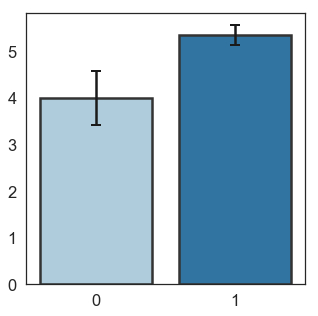

In [19]:
import seaborn as sns
sns.set(style="white", font_scale=1.5, rc={'figure.figsize':(5,5)})

exp_aha2_mean = np.mean(exp_aha2)
exp_aha2_error = stats.sem(exp_aha2)
unexp_aha2_mean = np.mean(unexp_aha2)
unexp_aha2_error = stats.sem(unexp_aha2)

sns.barplot(
    np.arange(2),
    [exp_aha2_mean, unexp_aha2_mean],
    yerr=[exp_aha2_error, unexp_aha2_error],palette="Paired", 
    errcolor=".2", edgecolor=".2",linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)


t, p = ttest_ind(exp_aha2, unexp_aha2, equal_var=False)
print(t,p)

#plt.show()

In [7]:
#remove bad subjects
import itertools

exp_idx = []

for k in range(7):
    indices = [i for i, x in enumerate(exp_warm1[k]) if x == 9] #if gotten answer before already
    exp_idx.append(indices)

indices = [i for i, x in enumerate(exp_warm1[7]) if x < 6] #if not got the answer at the last round
exp_idx.append(indices)

indices = [i for i, x in enumerate(exp_quiz) if x != 7] #if not got the correct quiz answer
exp_idx.append(indices)

exp_idx = list(itertools.chain.from_iterable(exp_idx))
exp_idx = list(sorted(set(exp_idx))) #get unique values

unexp_idx = []
for k in range(7):
    indices = [i for i, x in enumerate(unexp_warm1[k]) if x == 9] #if gotten answer before already
    unexp_idx.append(indices)

indices = [i for i, x in enumerate(unexp_warm1[7]) if x < 6] #if not got the answer at the last round
unexp_idx.append(indices)

indices = [i for i, x in enumerate(unexp_quiz) if x != 7] #if not got the correct quiz answer
unexp_idx.append(indices)

unexp_idx = list(itertools.chain.from_iterable(unexp_idx)) #flatten the list
unexp_idx = list(sorted(set(unexp_idx))) #get unique values

print(exp_aha1)
exp_aha1 = [i for j, i in enumerate(exp_aha1) if j not in exp_idx]
print(len(exp_idx))
print(exp_aha1)

print(unexp_aha1)
unexp_aha1 = [i for j, i in enumerate(unexp_aha1) if j not in unexp_idx]
print(len(unexp_idx))
print(unexp_aha1)

[0, 3, 6, 2, 6, 6, 6, 0, 6, 6, 4, 6, 5, 6, 0, 6, 6, 0, 6, 6, 6, 3, 6, 6, 0, 6, 6, 6, 6, 0, 0, 0, 5, 4, 0, 6, 6, 6, 0, 0, 5, 6, 6, 1, 6, 5, 5, 6, 6, 6]
21
[6, 2, 6, 6, 6, 6, 4, 5, 6, 6, 6, 6, 3, 6, 6, 6, 5, 4, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6]
[1, 0, 3, 5, 5, 6, 6, 0, 6, 0, 2, 6, 6, 4, 6, 6, 0, 6, 6, 0, 0, 0, 0, 3, 6, 6, 5, 6, 6, 6, 6, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6]
20
[5, 5, 6, 6, 2, 6, 6, 4, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6]


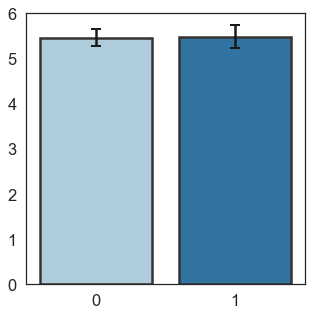

In [20]:
import seaborn as sns
sns.set(style="white", font_scale=1.5, rc={'figure.figsize':(5,5)})

exp_aha1_mean = np.mean(exp_aha1)
exp_aha1_error = stats.sem(exp_aha1)
unexp_aha1_mean = np.mean(unexp_aha1)
unexp_aha1_error = stats.sem(unexp_aha1)

sns.barplot(
    np.arange(2),
    [exp_aha1_mean, unexp_aha1_mean],
    yerr=[exp_aha1_error, unexp_aha1_error],palette="Paired", 
    errcolor=".2", edgecolor=".2",linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)

plt.show()